In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
%matplotlib inline
plt.show()
sns.set()

plt.rcParams["figure.figsize"] = 12, 9
plt.style.use('fivethirtyeight')



In [5]:
%matplotlib inline

In [3]:
episodes = pd.read_csv('simpsons_episodes.csv')                                                                                                                             

In [4]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      600 non-null    int64  
 1   image_url               596 non-null    object 
 2   imdb_rating             597 non-null    float64
 3   imdb_votes              597 non-null    float64
 4   number_in_season        600 non-null    int64  
 5   number_in_series        600 non-null    int64  
 6   original_air_date       600 non-null    object 
 7   original_air_year       600 non-null    int64  
 8   production_code         600 non-null    object 
 9   season                  600 non-null    int64  
 10  title                   600 non-null    object 
 11  us_viewers_in_millions  594 non-null    float64
 12  video_url               596 non-null    object 
 13  views                   596 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory 

In [8]:
episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


In [9]:
episodes.drop(['image_url', 'production_code', 'video_url'], axis=1, inplace=True)
episodes.sort_values(['number_in_series'], inplace=True)
episodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 241 to 576
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      593 non-null    int64  
 1   imdb_rating             593 non-null    float64
 2   imdb_votes              593 non-null    float64
 3   number_in_season        593 non-null    int64  
 4   number_in_series        593 non-null    int64  
 5   original_air_date       593 non-null    object 
 6   original_air_year       593 non-null    int64  
 7   season                  593 non-null    int64  
 8   title                   593 non-null    object 
 9   us_viewers_in_millions  593 non-null    float64
 10  views                   593 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 55.6+ KB


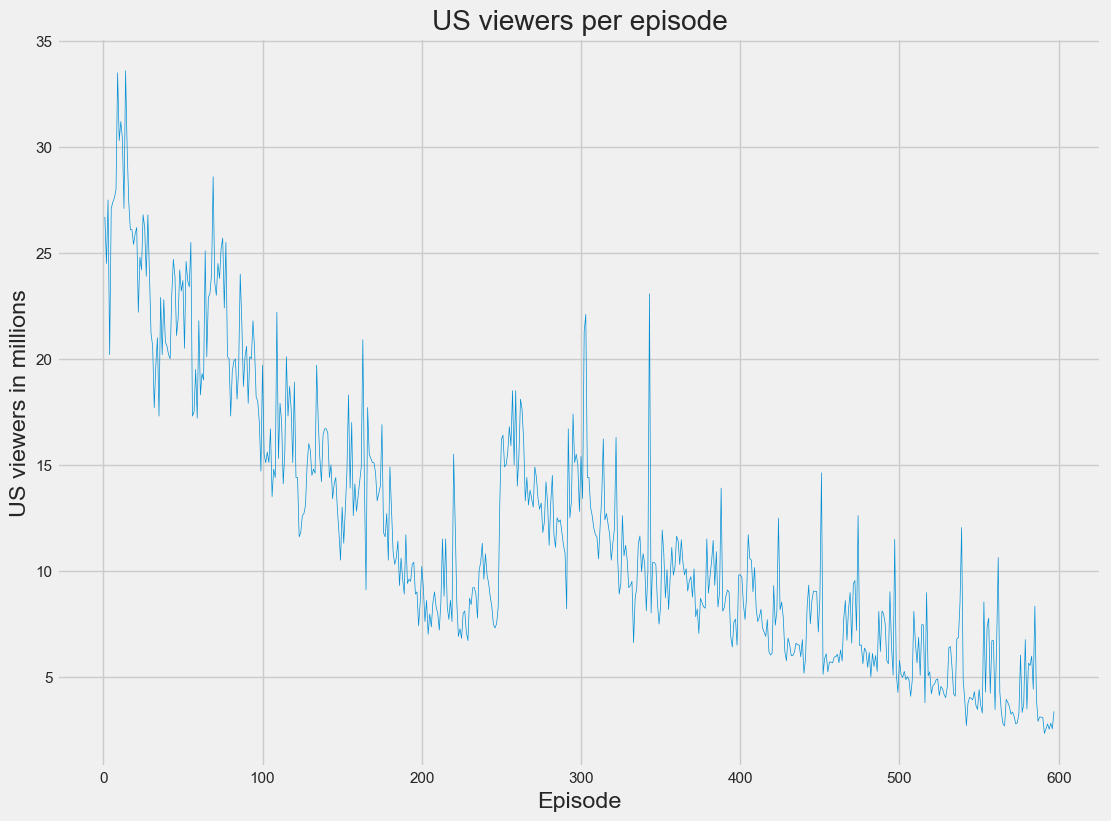

In [10]:
lineplot = sns.lineplot(x='number_in_series', y='us_viewers_in_millions', data=episodes, linewidth=0.5)
plt.xlabel('Episode')
plt.ylabel('US viewers in millions')
plt.title('US viewers per episode')
plt.show()


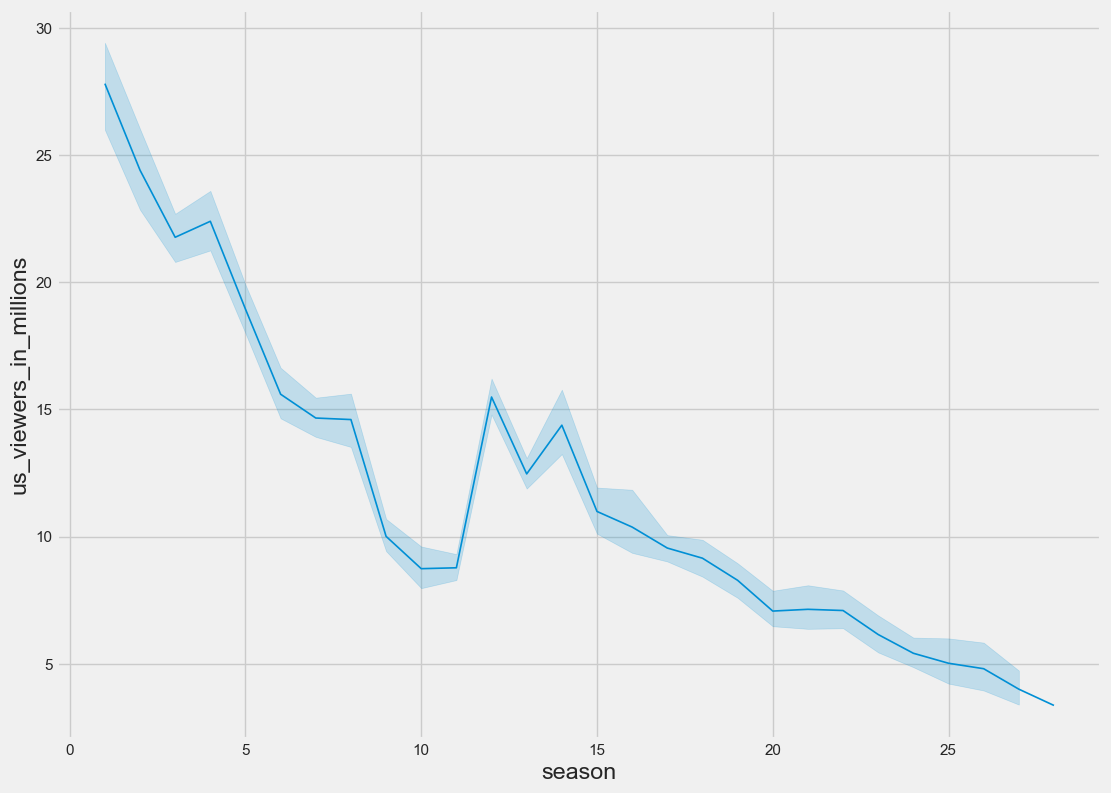

In [11]:

lineplot_season = sns.lineplot(x='season', y='us_viewers_in_millions', data=episodes, linewidth=1.2)

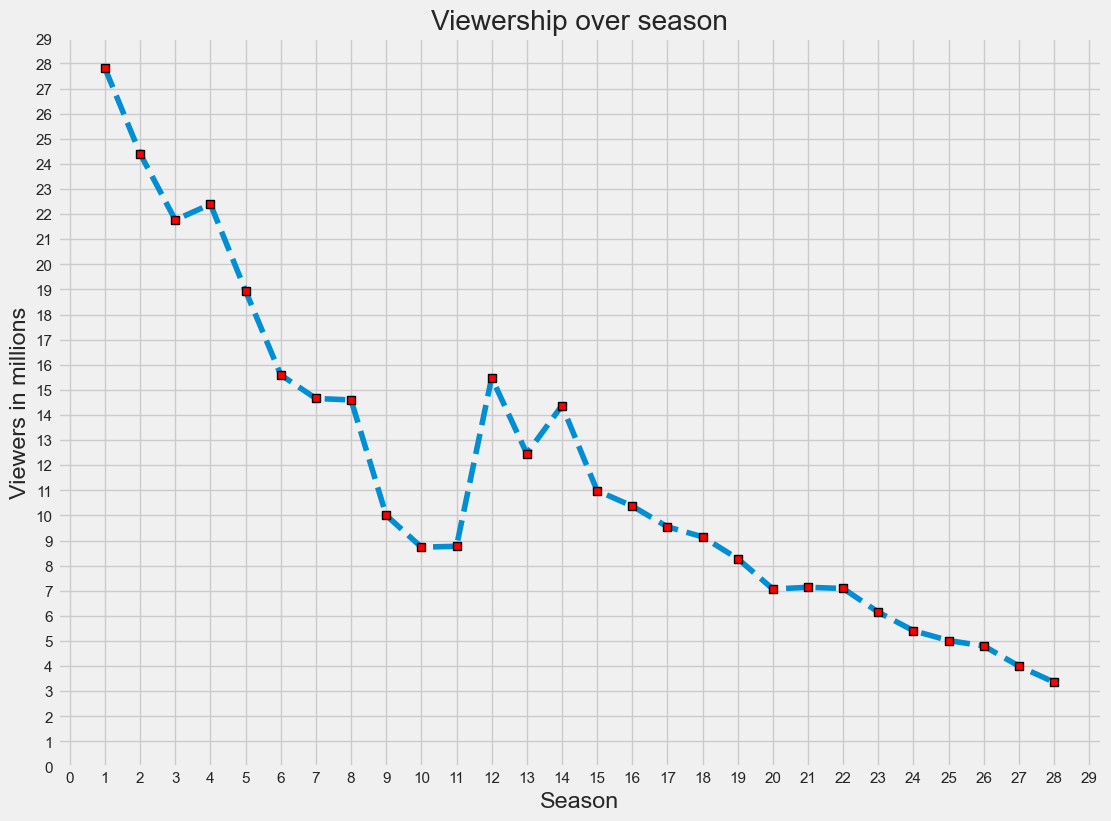

In [12]:
episodes.groupby('season')['us_viewers_in_millions'].mean().plot(linestyle='--', mfc='red', mec='black', marker='s')
plt.xticks(np.arange(0, 30, step=1))
plt.yticks(np.arange(0, 30, step=1))
plt.title('Viewership over season')
plt.xlabel('Season')
plt.ylabel('Viewers in millions')
plt.show()



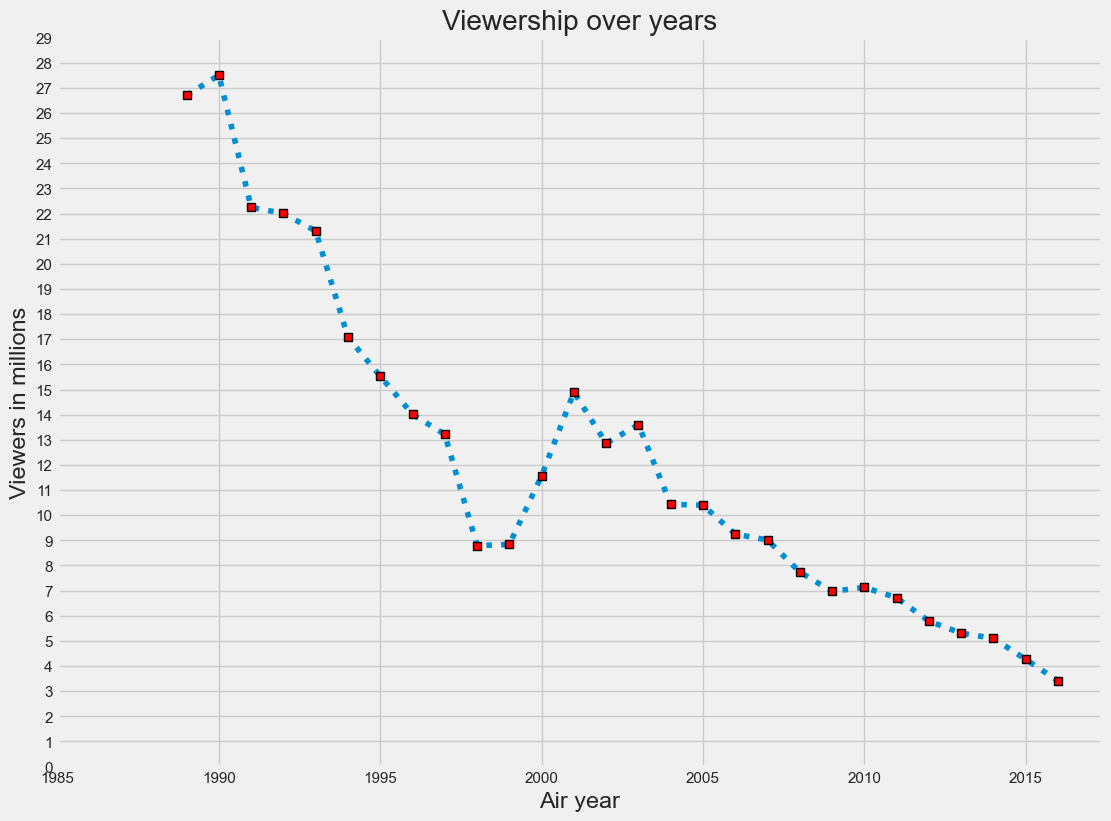

In [13]:
episodes.groupby('original_air_year')['us_viewers_in_millions'].mean().plot(linestyle='dotted', mfc='red', mec='black', marker='s')
plt.xticks(np.arange(1985, 2020, step=5))
plt.yticks(np.arange(0, 30, step=1))
plt.title('Viewership over years')
plt.xlabel('Air year')
plt.ylabel('Viewers in millions')
plt.show()

In [14]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 241 to 576
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      593 non-null    int64  
 1   imdb_rating             593 non-null    float64
 2   imdb_votes              593 non-null    float64
 3   number_in_season        593 non-null    int64  
 4   number_in_series        593 non-null    int64  
 5   original_air_date       593 non-null    object 
 6   original_air_year       593 non-null    int64  
 7   season                  593 non-null    int64  
 8   title                   593 non-null    object 
 9   us_viewers_in_millions  593 non-null    float64
 10  views                   593 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 55.6+ KB


In [15]:
episodes.loc[episodes['original_air_year'] == 2007, 'season']

420    18
432    18
147    18
431    18
148    18
417    18
149    18
433    18
415    18
150    18
434    18
151    18
429    18
587    19
152    19
562    19
588    19
416    19
153    19
427    19
154    19
589    19
Name: season, dtype: int64

In [16]:
episodes.loc[episodes['title'] == "Who Shot Mr. Burns? (Part One)"]

,id,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,season,title,us_viewers_in_millions,views
534,128,9.1,1619.0,25,128,1995-05-21,1995,6,Who Shot Mr. Burns? (Part One),15.0,86070.0


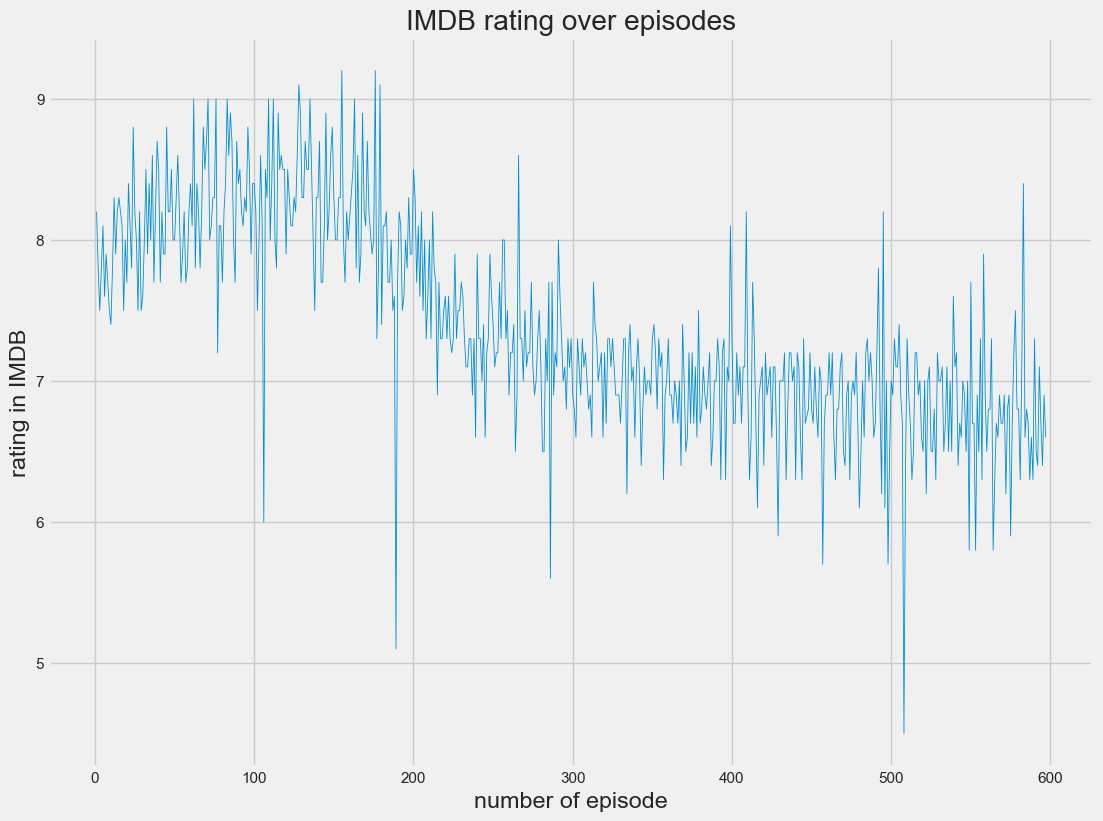

In [17]:
sns.lineplot(data=episodes, x='number_in_series', y='imdb_rating', linewidth=0.6)
plt.xlabel('number of episode')
plt.ylabel('rating in IMDB')
plt.title('IMDB rating over episodes')
plt.show()

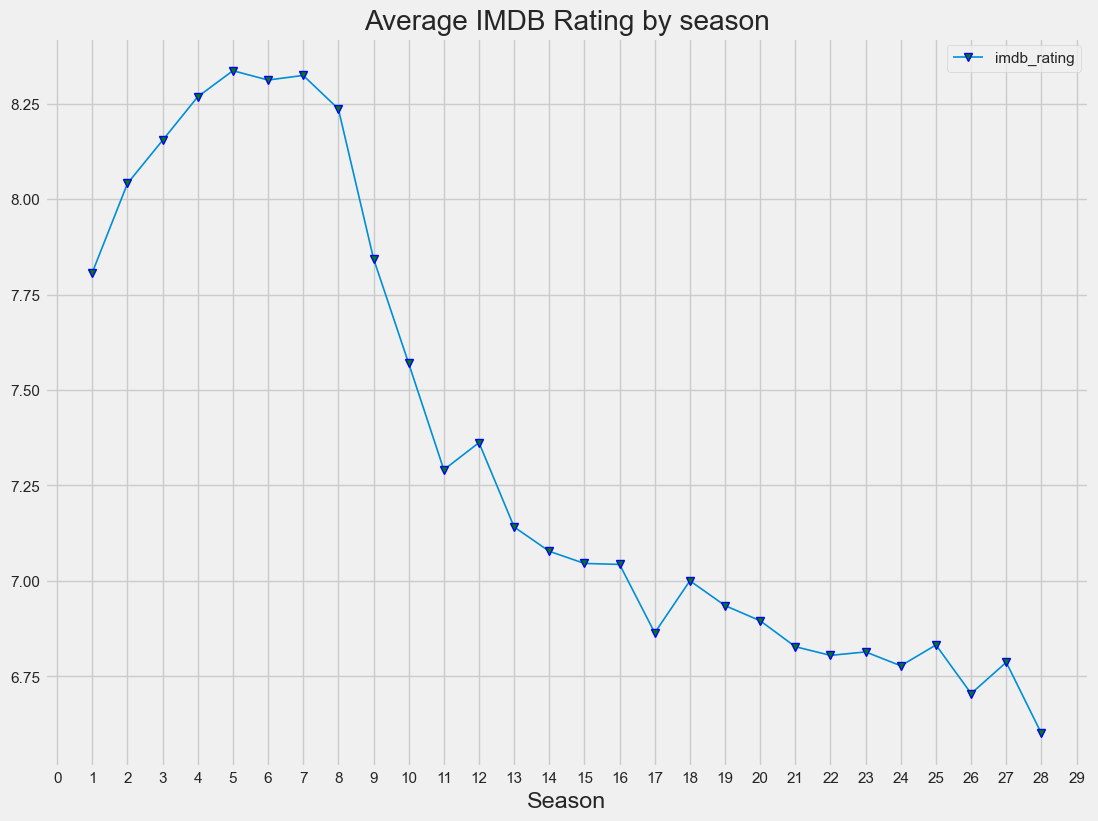

In [18]:
episodes.groupby('season')['imdb_rating'].mean().plot(linestyle='solid', marker='v', mfc='green', mec='blue', linewidth=1.2)
plt.xticks(np.arange(0, 30, step=1))
plt.xlabel('Season')
plt.title('Average IMDB Rating by season')
plt.legend(loc='best')
plt.show()




In [19]:
pivot_table = episodes.pivot_table(index='season', 
    columns='number_in_season', 
    values='imdb_rating')
pivot_table.head(10)

number_in_season,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
season,,,,,,,,,,,,,,,,,,,,,
1,8.2,7.8,7.5,7.8,8.1,7.6,7.9,7.7,7.5,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.2,8.3,8.2,8.1,7.5,8.0,7.7,8.4,8.1,7.8,...,7.5,7.6,8.0,8.5,7.9,8.4,8.0,NaN,NaN,NaN
3,8.6,7.7,8.2,8.7,8.5,7.7,8.2,7.9,7.9,8.8,...,8.3,8.6,8.2,7.7,7.9,8.2,7.7,7.8,8.2,NaN
4,8.4,8.1,9.0,7.8,8.4,8.2,7.8,8.2,8.8,8.5,...,8.3,9.0,7.2,8.1,8.1,7.7,8.2,NaN,NaN,NaN
5,8.4,9.0,8.6,8.9,8.7,8.0,7.7,8.7,8.4,8.5,...,8.5,7.9,8.4,8.4,8.2,7.5,8.0,NaN,NaN,NaN
6,8.6,8.1,6.0,8.5,8.3,9.0,8.0,8.4,9.0,8.0,...,8.5,7.9,8.5,8.3,8.1,8.1,8.3,8.2,8.6,9.1
7,8.9,8.3,8.3,8.7,8.5,8.5,9.0,8.5,8.0,7.5,...,8.1,8.9,8.0,8.2,8.6,8.8,8.3,8.0,8.0,8.3
8,8.3,9.2,8.0,7.7,8.2,8.0,NaN,NaN,8.5,9.0,...,8.2,8.1,8.7,8.2,NaN,7.9,8.0,9.2,7.3,7.8
9,9.1,7.4,8.1,8.1,8.2,7.7,7.7,8.0,7.5,7.6,...,7.6,8.0,7.8,8.3,7.9,7.9,8.5,8.3,7.7,8.1


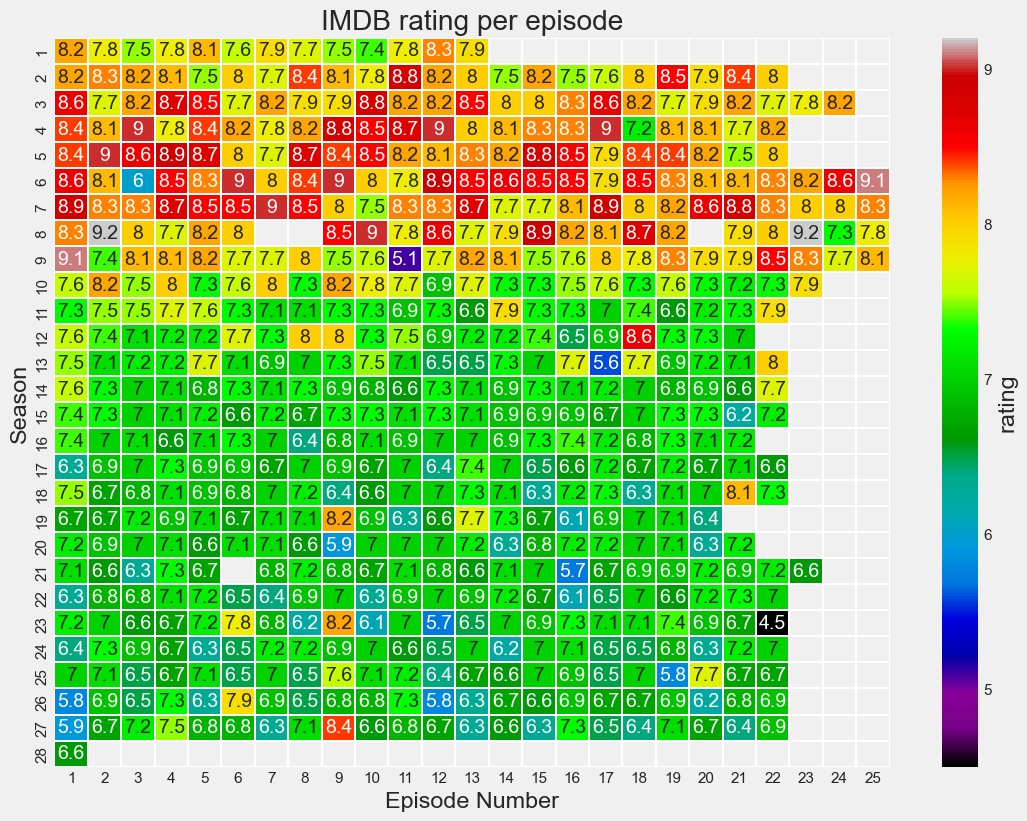

In [20]:
sns.heatmap(data=pivot_table, annot=True, linewidths=0.2, cbar_kws={'label': 'rating'}, cmap='nipy_spectral')
plt.xlabel('Episode Number')
plt.ylabel('Season')
plt.title('IMDB rating per episode')
plt.show()

In [21]:
episodes[episodes['imdb_rating'] == episodes.imdb_rating.max()]

,id,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,season,title,us_viewers_in_millions,views
535,155,9.2,2439.0,2,155,1996-11-03,1996,8,You Only Move Twice,13.9,79609.0
537,176,9.2,2256.0,23,176,1997-05-04,1997,8,Homer's Enemy,11.8,74177.0


In [22]:
episodes[episodes.imdb_rating == episodes.imdb_rating.min()]

,id,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,season,title,us_viewers_in_millions,views
193,508,4.5,1215.0,22,508,2012-05-20,2012,23,Lisa Goes Gaga,4.82,44434.0


In [23]:
characters = pd.read_csv('simpsons_characters.csv')
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6722 non-null   int64 
 1   name             6722 non-null   object
 2   normalized_name  6722 non-null   object
 3   gender           323 non-null    object
dtypes: int64(1), object(3)
memory usage: 210.2+ KB


In [24]:
characters.head(50)

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN
5,24,Little Boy,little boy,NaN
6,26,Lewis Clark,lewis clark,NaN
7,27,Little Girl,little girl,NaN
8,29,Bubbles,bubbles,NaN
9,30,Moldy,moldy,NaN


In [25]:
characters.dropna(how='any', inplace=True)
characters.reset_index(drop=True, inplace=True)
characters.head(15)

,id,name,normalized_name,gender
0,1,Marge Simpson,marge simpson,f
1,8,Bart Simpson,bart simpson,m
2,9,Lisa Simpson,lisa simpson,f
3,17,Moe Szyslak,moe szyslak,m
4,3,Seymour Skinner,seymour skinner,m
5,11,Ned Flanders,ned flanders,m
6,31,Grampa Simpson,grampa simpson,m
7,71,Chief Wiggum,chief wiggum,m
8,25,Milhouse Van Houten,milhouse van houten,m
9,14,Waylon Smithers,waylon smithers,m


Text(0, 0.5, 'SUM')

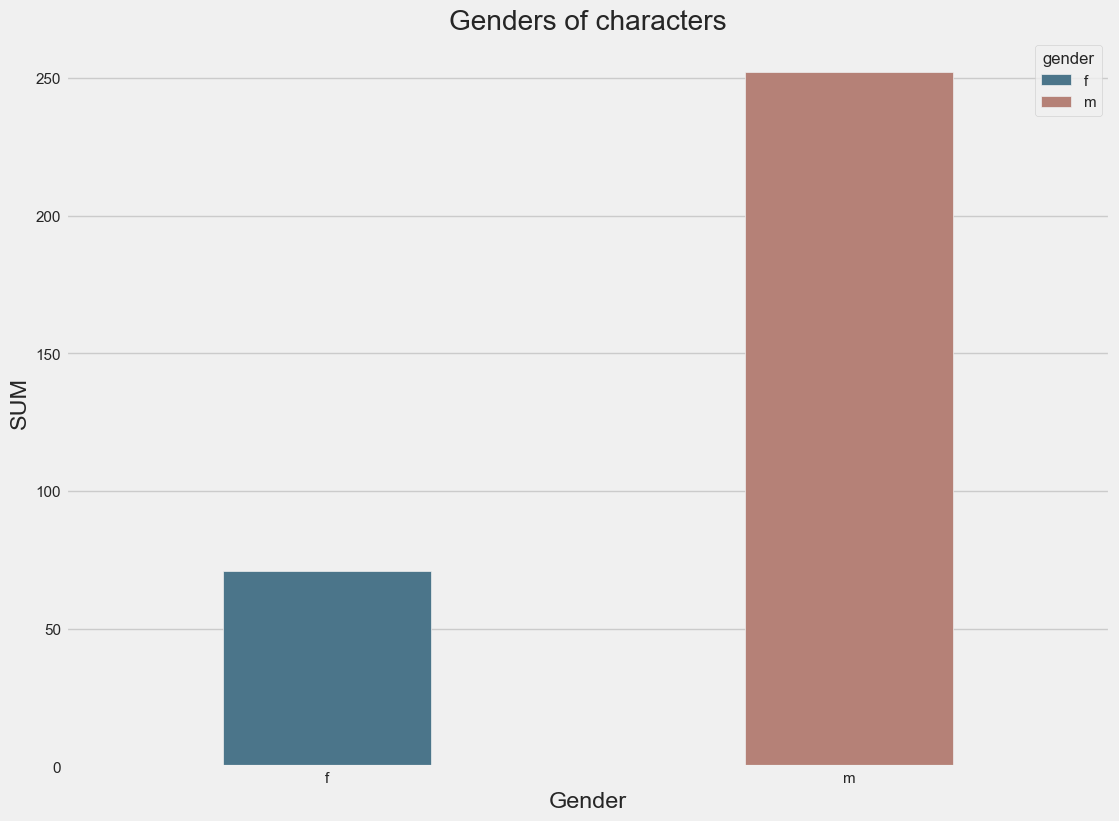

In [26]:
sns.countplot(data=characters, x='gender', hue='gender', width=0.4, dodge=False, saturation=0.3)
plt.title('Genders of characters')
plt.xlabel('Gender')
plt.ylabel('SUM')


In [27]:
script_lines = pd.read_csv('simpsons_script_lines.csv')
script_lines.info()

C:\Users\kybar\AppData\Local\Temp\ipykernel_26712\1705200900.py:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  script_lines = pd.read_csv('simpsons_script_lines.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158271 non-null  int64  
 1   episode_id          158271 non-null  int64  
 2   number              158271 non-null  int64  
 3   raw_text            158271 non-null  object 
 4   timestamp_in_ms     158271 non-null  object 
 5   speaking_line       158271 non-null  object 
 6   character_id        140750 non-null  object 
 7   location_id         157864 non-null  float64
 8   raw_character_text  140749 non-null  object 
 9   raw_location_text   157863 non-null  object 
 10  spoken_words        132112 non-null  object 
 11  normalized_text     132087 non-null  object 
 12  word_count          132112 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 15.7+ MB


In [28]:
script_lines.sort_values(['number'], inplace=True)
script_lines.head(2)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
39229,49064,174,0,(Master Bedroom: INT. master BEDROOM - that mi...,11000,False,NaN,46.0,NaN,Master Bedroom,NaN,NaN,NaN
122857,133062,474,0,Groundskeeper Willie: Dodgeball!,99000,True,404.0,NaN,Groundskeeper Willie,NaN,Dodgeball!,dodgeball,1


In [29]:
script_lines.drop(['id', 
            'episode_id',
            'raw_text',
            'timestamp_in_ms',
            'speaking_line'], 
            inplace=True,
            axis=1)


In [30]:
script_lines.dropna(inplace=True)
script_lines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131708 entries, 2007 to 55319
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   number              131708 non-null  int64  
 1   character_id        131708 non-null  object 
 2   location_id         131708 non-null  float64
 3   raw_character_text  131708 non-null  object 
 4   raw_location_text   131708 non-null  object 
 5   spoken_words        131708 non-null  object 
 6   normalized_text     131708 non-null  object 
 7   word_count          131708 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.0+ MB


In [31]:
print(script_lines.shape)
script_lines.head()

(131708, 8)


,number,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
2007,1,8.0,43.0,Bart Simpson,Bart's Bedroom,Good mornin' world!,good mornin world,3
48487,1,518.0,136.0,Snake Jailbird,Kwik-E-Mart,"Hmm, good lines, nice balance. Let's see how s...",hmm good lines nice balance lets see how she h...,10
65754,1,1122.0,5.0,Commercial Announcer,Simpson Home,Are you sick of ordinary-shaped amusement parks?,are you sick of ordinary-shaped amusement parks,7
109832,1,2.0,136.0,Homer Simpson,Kwik-E-Mart,"Stupid shopping list, turning food into work. ...",stupid shopping list turning food into work bart,8
61178,1,56.0,755.0,Narrator,Sky,They were the first family of American laughte...,they were the first family of american laughte...,14


In [32]:
script_lines['character_id'] = script_lines['character_id'].astype('int64')

In [33]:
script_lines.rename(columns={'character_id' : 'id'}, inplace=True)
script_lines.head()

,number,id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
2007,1,8,43.0,Bart Simpson,Bart's Bedroom,Good mornin' world!,good mornin world,3
48487,1,518,136.0,Snake Jailbird,Kwik-E-Mart,"Hmm, good lines, nice balance. Let's see how s...",hmm good lines nice balance lets see how she h...,10
65754,1,1122,5.0,Commercial Announcer,Simpson Home,Are you sick of ordinary-shaped amusement parks?,are you sick of ordinary-shaped amusement parks,7
109832,1,2,136.0,Homer Simpson,Kwik-E-Mart,"Stupid shopping list, turning food into work. ...",stupid shopping list turning food into work bart,8
61178,1,56,755.0,Narrator,Sky,They were the first family of American laughte...,they were the first family of american laughte...,14


In [34]:
merged = characters.merge(script_lines, on='id', how='left').dropna()
merged.head()

,id,name,normalized_name,gender,number,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,1,Marge Simpson,marge simpson,f,1,5.0,Marge Simpson,Simpson Home,Hm...,hm,1
1,1,Marge Simpson,marge simpson,f,1,3319.0,Marge Simpson,Therapist's Office,"You see, the problem is, we've grown apart.",you see the problem is weve grown apart,8
2,1,Marge Simpson,marge simpson,f,1,5.0,Marge Simpson,Simpson Home,"Oooh, the new issue of ""Smothering Mother Maga...",oooh the new issue of smothering mother magazine,8
3,1,Marge Simpson,marge simpson,f,1,5.0,Marge Simpson,Simpson Home,Come on! Just pick one!,come on just pick one,5
4,1,Marge Simpson,marge simpson,f,1,5.0,Marge Simpson,Simpson Home,"Come and get me, you syrupy stack of man-cakes.",come and get me you syrupy stack of man-cakes,9


In [35]:
merged.drop(['normalized_name', 'raw_character_text', 'number'], axis=1, inplace=True)


In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112246 entries, 0 to 112245
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 112246 non-null  int64  
 1   name               112246 non-null  object 
 2   gender             112246 non-null  object 
 3   location_id        112246 non-null  float64
 4   raw_location_text  112246 non-null  object 
 5   spoken_words       112246 non-null  object 
 6   normalized_text    112246 non-null  object 
 7   word_count         112246 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.7+ MB


In [37]:
top_charatcers = merged.groupby('name')['name'].count().sort_values(ascending=False)
top_charatcers[:10]
top10 = top_charatcers[:10]

Text(0.5, 0, 'Number of lines')

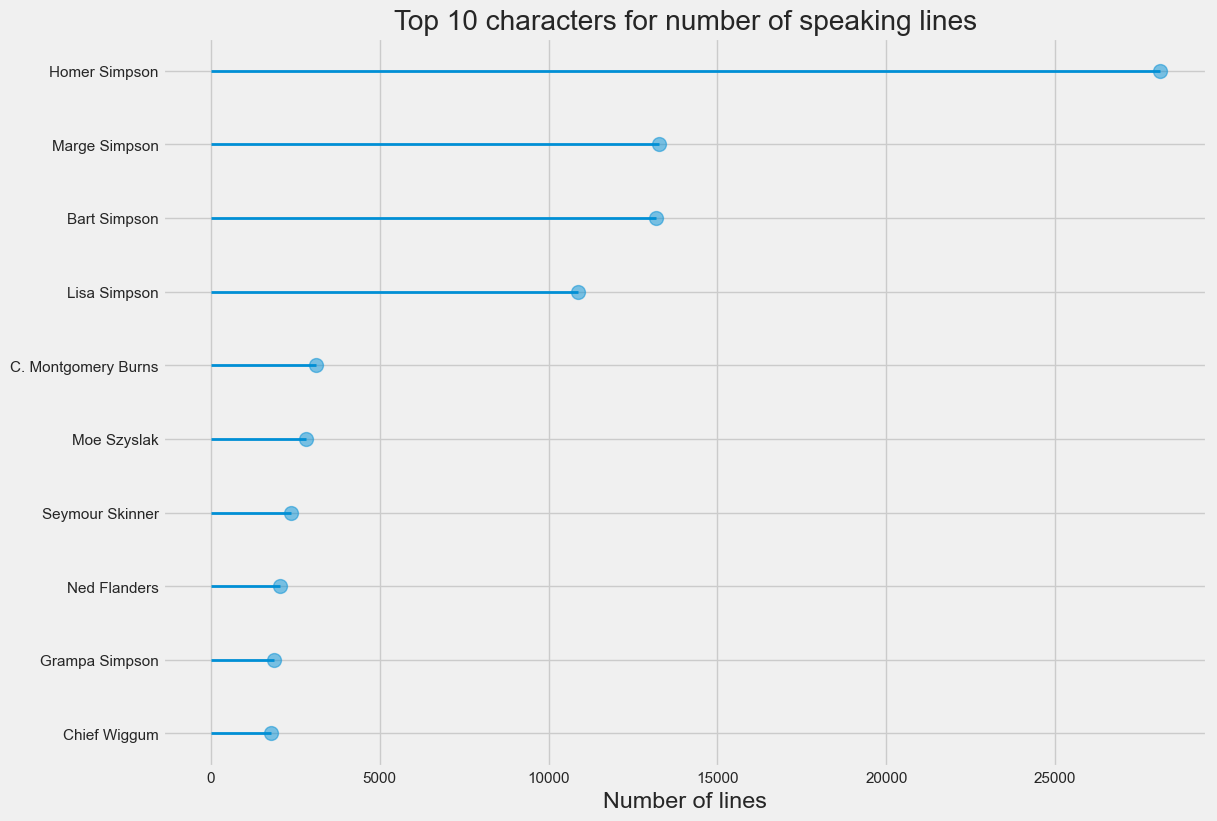

In [47]:
fig, ax = plt.subplots()
ax.hlines(top10.index, xmin=0, xmax=top10.values, linewidth=2)
ax.plot(top10.values, top10.index, 'o', markersize=10, alpha=0.5, linewidth=2)
ax.invert_yaxis()
ax.set_title('Top 10 characters for number of speaking lines')
ax.set_xlabel('Number of lines')

Text(0.5, 0, 'Number of speaking lines')

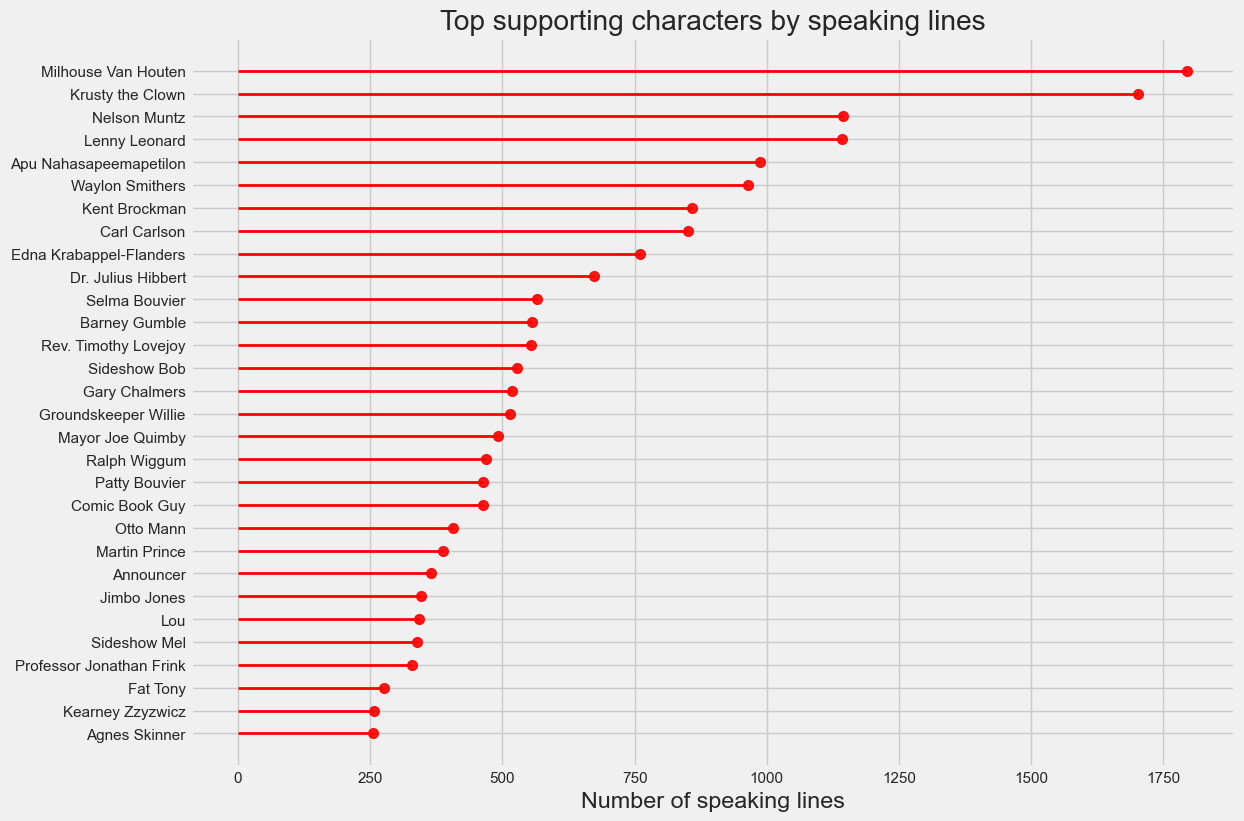

In [53]:
support_characters = top_charatcers[10:40]
fig, ax = plt.subplots()
ax.hlines(support_characters.index, xmin=0, xmax=support_characters.values, linewidth=2, color='red')
ax.plot(support_characters.values, support_characters.index, 'o', color='red', markersize=7, alpha=0.9)
ax.invert_yaxis()
ax.set_title('Top supporting characters by speaking lines')
ax.set_xlabel('Number of speaking lines')



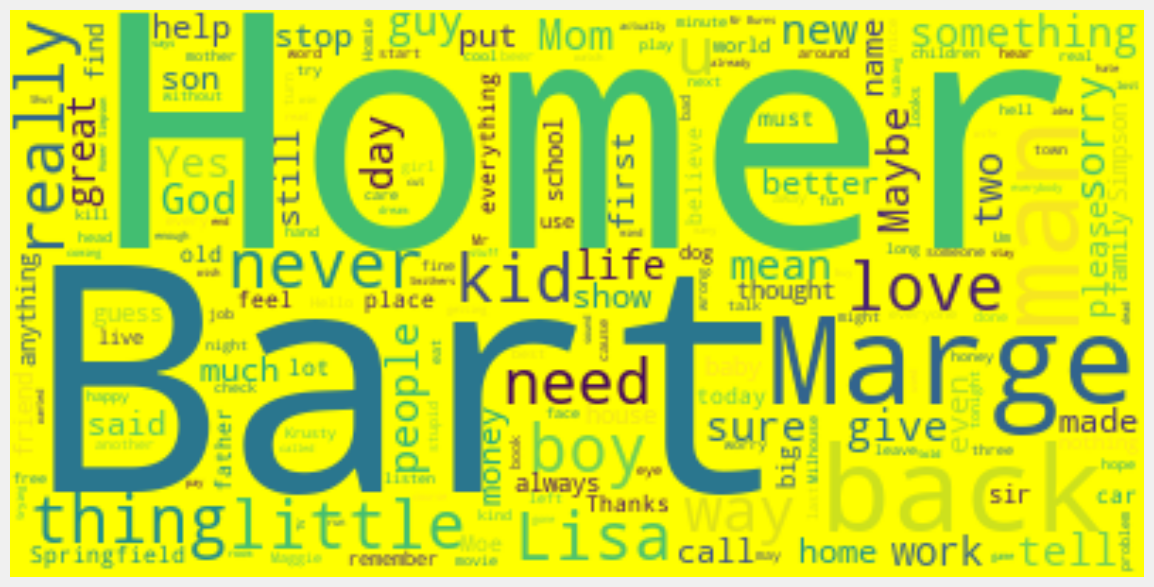

In [61]:
text = " ".join(line for line in merged['spoken_words'])
stopwords = set(STOPWORDS)
stopwords.update(["hey", "gonna", "yeah", "uh", "ya", "ho", "la", "em",
                   "ah", "huh", "ooh", "gotta", "eh", "aw", "heh", "wow",
                   "ow", "haw", "woo",  "ha", "wanna", "whoa", "hoo", "ye", "wait","now","Oh","Well","one",
                 "go", "okay", "know","right",'look', 'let','got', 'Thank', 'see', 'will', 'want',
                 'come', 'think', 'take', 'time', 'good', 'keep', 'say', 'make', 'going', 'Dad'])
plt.figure(figsize=[15,7])
wordcloud = WordCloud(max_words=1000, background_color='yellow', stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [64]:
location = merged.groupby('raw_location_text')['raw_location_text'].count().sort_values(ascending=False)
best_location = location[:10]
best_location.head()

raw_location_text
Simpson Home                       27815
Springfield Elementary School       5336
Moe's Tavern                        3634
Springfield Nuclear Power Plant     2733
Kwik-E-Mart                         1182
Name: raw_location_text, dtype: int64

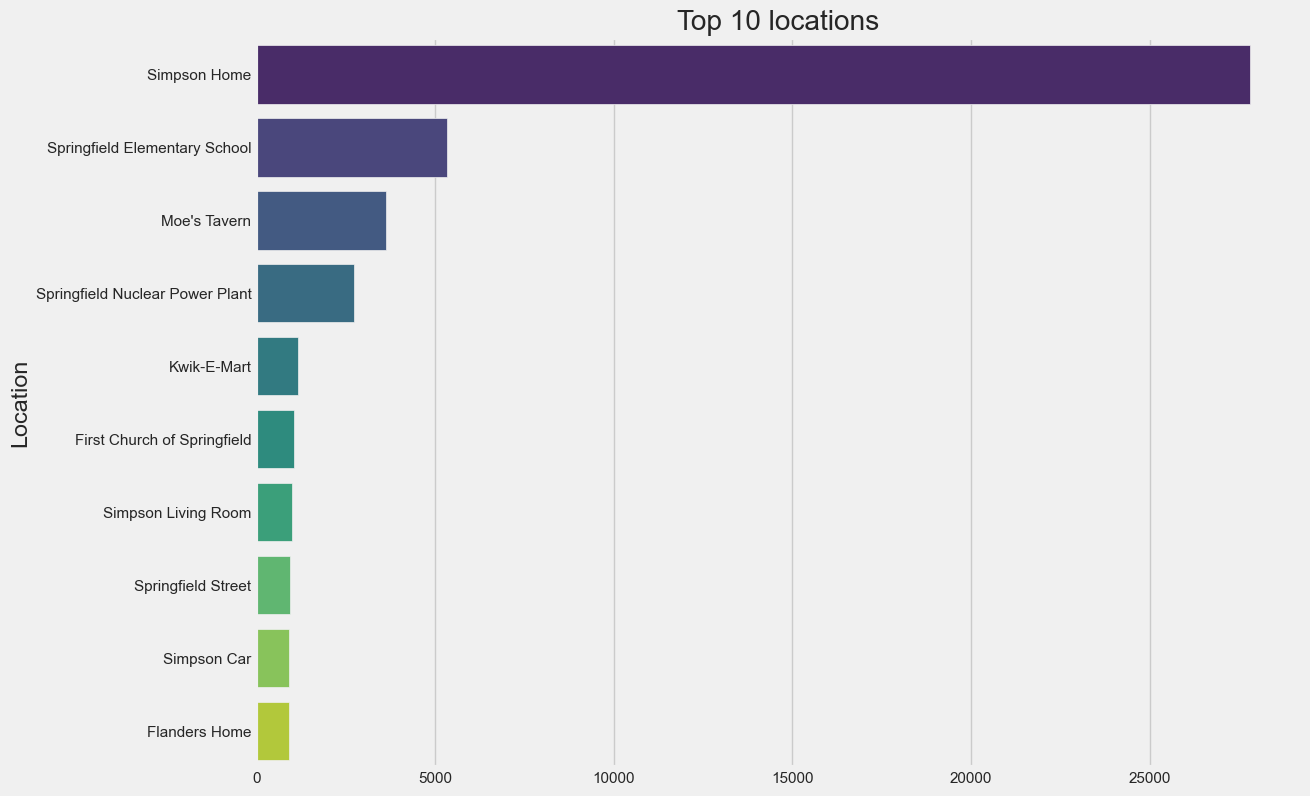

In [65]:
fig, ax = plt.subplots(1,1)
sns.barplot(y=best_location.index, x=best_location.values, palette='viridis')
ax.set_ylabel('Location')
ax.set_title('Top 10 locations')
plt.show()